<a href="https://colab.research.google.com/github/Safarova905/ML_homeworks/blob/main/knp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
def graph(n: int):
    array = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            array[i][j] = array[j][i] = np.random.randint(10, 100)
    return array

In [3]:
n = 15
matrix = graph(n)

{(0, 1): Text(-0.36276598637323576, -0.5583183246440429, '32.0'),
 (0, 2): Text(0.12710569587426396, -0.6231810184668836, '23.0'),
 (0, 3): Text(0.020821500776613155, -0.00080105124110047, '16.0'),
 (0, 4): Text(-0.07251395735967975, -0.27539548764615596, '16.0'),
 (0, 5): Text(-0.7408387235245023, -0.05014814922545391, '62.0'),
 (0, 6): Text(-0.26412618793729115, -0.3471344651197782, '57.0'),
 (0, 7): Text(-0.6047582182000516, -0.44223574904296387, '42.0'),
 (0, 8): Text(-0.46034131335547146, 0.12340599993250634, '65.0'),
 (0, 9): Text(-0.2824534397342692, -0.08751967316678694, '77.0'),
 (0, 10): Text(-0.12078241154645022, -0.6597563990284401, '81.0'),
 (0, 11): Text(0.16619998101254468, -0.3033161605695619, '18.0'),
 (0, 12): Text(-0.27741245401001874, -0.8303727795852522, '89.0'),
 (0, 13): Text(-0.8329692871992969, -0.5220436529870517, '71.0'),
 (0, 14): Text(-0.6345654452600757, -0.20943611486646044, '98.0'),
 (1, 2): Text(0.43193974747593883, -0.44515272377901616, '61.0'),
 (1, 3

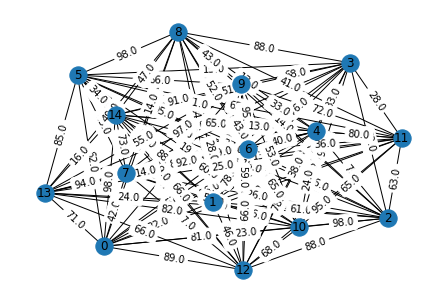

In [4]:
g = nx.Graph()
g.add_nodes_from([i for i in range(n)])
for i in range(n):
  for j in range(i, n):
    if matrix[i][j] != 0:
      g.add_edge(i, j, weight = matrix[i][j])
pos=nx.spring_layout(g)
nx.draw(g,pos, with_labels=True)
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

In [5]:
vertices = [-1 for i in range(len(matrix))]
min_g = nx.Graph()
min = 101
min_i = None
min_j = None
for i in range(n):
  for j in range(i + 1, n):
    if i != j:
      if matrix[i][j] <= min:
        min = matrix[i][j]
        min_i = i
        min_j = j

min_g.add_nodes_from([i for i in range(n)])
vertices[min_i] = 1
vertices[min_j] = 1
min_g.add_edge(min_i, min_j, weight = matrix[min_i][min_j])

In [6]:
vertices_num = 2
while vertices_num < n:
  min = 101
  min_i = None
  min_j = None
  for i in range(len(vertices)):
    if vertices[i] == 1:
      for j in range(n):
        if vertices[j] == -1 and matrix[i][j] <= min:
          min = matrix[i][j] 
          min_i = i
          min_j = j
  vertices[min_j] = 1
  min_g.add_edge(min_i, min_j, weight = matrix[min_i][min_j])
  vertices_num += 1

{(0, 4): Text(-0.12989757035845875, 0.8841611201882489, '16.0'),
 (1, 10): Text(-0.06323545544544196, -0.9254698629913953, '16.0'),
 (2, 8): Text(-0.1604498232666557, 0.5929395288805167, '14.0'),
 (3, 13): Text(0.14241538339642246, -0.39097912018171643, '15.0'),
 (3, 5): Text(0.03284779512597758, -0.5830031091641774, '15.0'),
 (4, 8): Text(-0.08319956912082384, 0.7036748292042678, '13.0'),
 (4, 9): Text(-0.05138253229526461, 0.8654493516877866, '33.0'),
 (5, 12): Text(-0.09561726659510807, -0.682240714040915, '19.0'),
 (5, 10): Text(-0.03706758015252981, -0.7625094750204493, '19.0'),
 (6, 13): Text(0.27523652348992694, -0.3071507701760695, '14.0'),
 (7, 11): Text(0.056741146693557176, 0.2632859647925281, '13.0'),
 (7, 8): Text(-0.03415118108690276, 0.48180688712028913, '14.0'),
 (11, 14): Text(0.1300090068348547, 0.040142785670930166, '13.0'),
 (13, 14): Text(0.1761187369815732, -0.1808137512090029, '16.0')}

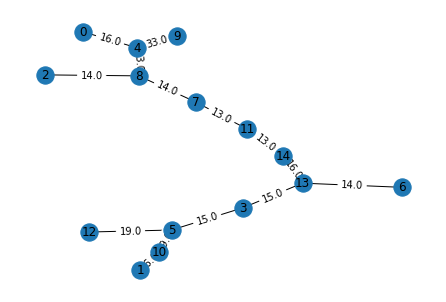

In [7]:
  pos=nx.spring_layout(min_g)
  nx.draw(min_g,pos, with_labels=True)
  labels = nx.get_edge_attributes(min_g,'weight')
  nx.draw_networkx_edge_labels(min_g,pos,edge_labels=labels)

In [8]:
edges = min_g.edges()
weights = []
for edge in edges:
  weights.append(matrix[edge[0]][edge[1]])

In [9]:
weights = sorted(weights, reverse=True)

In [10]:
plt=px.line(x=[x for x in range(1, len(weights) + 1)], y=weights)
plt.show()

In [11]:
max = 0
K = 1
for i in range(1, len(weights) - 1):
  d = abs(weights[i] - weights[i + 1]) / abs(weights[i - 1] - weights[i])
  if (d > max):
    max = d
    K = i + 1
print(f'Optimal K = {K}') 

Optimal K = 3


<ipython-input-11-2b1963abebb4>:4: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-11-2b1963abebb4>:4: RuntimeWarning:

invalid value encountered in double_scalars



In [12]:
k = 0
clustered_g = min_g
while k < K:
  max = -1
  max_i = None
  max_j = None
  for edge in edges:
    if edge != None:
      weight = matrix[edge[0]][edge[1]]
      if weight >= max:
        max = weight
        max_i = edge[0]
        max_j = edge[1]
  clustered_g.remove_edge(max_i, max_j)
  k += 1

{(0, 4): Text(-0.3087557603686636, -0.25806451612903225, '16.0'),
 (1, 10): Text(0.6244239631336406, -0.2926267281105991, '16.0'),
 (2, 8): Text(-0.2741935483870968, -0.08525345622119816, '14.0'),
 (3, 13): Text(-0.20506912442396316, 0.3294930875576037, '15.0'),
 (3, 5): Text(-0.4815668202764978, 0.1912442396313364, '15.0'),
 (4, 8): Text(0.3133640552995392, -0.11981566820276499, '13.0'),
 (6, 13): Text(-0.17050691244239632, 0.3640552995391705, '14.0'),
 (7, 11): Text(0.07142857142857142, 0.12211981566820278, '13.0'),
 (7, 8): Text(0.1751152073732719, 0.018433179723502304, '14.0'),
 (11, 14): Text(0.002304147465437778, 0.1912442396313364, '13.0'),
 (13, 14): Text(-0.06682027649769587, 0.2603686635944701, '16.0')}

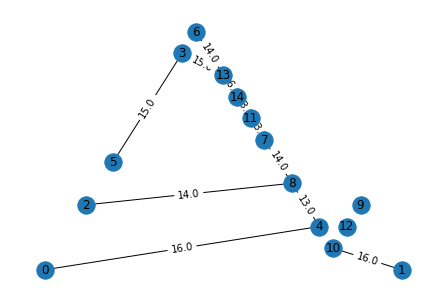

In [13]:
  pos=nx.planar_layout(clustered_g)
  nx.draw(clustered_g,pos, with_labels=True)
  labels = nx.get_edge_attributes(clustered_g,'weight')
  nx.draw_networkx_edge_labels(clustered_g,pos,edge_labels=labels)